#### LINEAR REGRESSION FROM SCRATCH
- LINEAR : predicts a continues value using a straight line
- REGRESSION : Regression is the type of machine learning technique used to predict a value based on the relationship between variables such as finding the pattern in the past data.

Linear Regression is useful when we are trying to predict some continuous output


In [1]:
# Importing the libraries
import numpy as np
import pickle

In [4]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000, normalize=True, early_stopping=False, patience=20, tolerance=1e-4):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.normalize = normalize
        self.early_stopping = early_stopping
        self.patience = patience
        self.tolerance = tolerance

        self.weights = None
        self.bias = None
        self.loss_history = []
        self.X_mean = None
        self.X_std = None

    def _normalize_features(self, X):
        self.X_mean = np.mean(X, axis=0)
        self.X_std = np.std(X, axis=0)
        return (X - self.X_mean) / self.X_std

    def _mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def _mean_absolute_error(self, y_true, y_pred):
        return np.mean(np.abs(y_true - y_pred))

    def fit(self, X, y):
        if self.normalize:
            X = self._normalize_features(X)

        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        best_loss = float('inf')
        epochs_without_improvement = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            loss = self._mean_squared_error(y, y_pred)
            self.loss_history.append(loss)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if self.early_stopping:
                if best_loss - loss < self.tolerance:
                    epochs_without_improvement += 1
                    if epochs_without_improvement >= self.patience:
                        print("Early stopping triggered.")
                        break
                else:
                    best_loss = loss
                    epochs_without_improvement = 0

    def predict(self, X):
        if self.normalize:
            X = (X - self.X_mean) / self.X_std
        return np.dot(X, self.weights) + self.bias

    def r2_score(self, y_true, y_pred):
        ss_res = np.sum((y_true - y_pred) ** 2)
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
        return 1 - (ss_res / ss_tot)

    def summary(self):
        print("Model Summary:")
        print("Weights:", self.weights)
        print("Bias:", self.bias)
        print("Final MSE Loss:", self.loss_history[-1] if self.loss_history else "Not trained")

    def get_loss_history(self):
        return self.loss_history

    def save_model(self, filename):
        with open(filename, 'wb') as f:
            pickle.dump(self, f)

    @staticmethod
    def load_model(filename):
        with open(filename, 'rb') as f:
            return pickle.load(f)

Early stopping triggered.
Model Summary:
Weights: [1.11802976 1.11802976]
Bias: 5.987957919899912
Final MSE Loss: 0.00014795609235717267


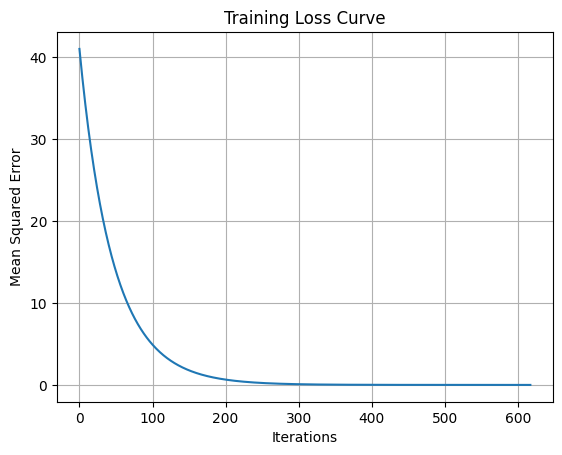

(0.9999709976470695,
 array([1.11802976, 1.11802976]),
 5.987957919899912,
 array([2.98796927, 4.9879617 , 6.98795414, 8.98794657]))

In [ ]:
# Let's test this class briefly and visualize the loss curve
import matplotlib.pyplot as plt

# Sample multivariable data
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
y = np.array([3, 5, 7, 9])

model = LinearRegression(learning_rate=0.01, n_iters=1000, early_stopping=True)
model.fit(X, y)
predictions = model.predict(X)
r2 = model.r2_score(y, predictions)
model.summary()

# Plotting the loss curve
plt.plot(model.get_loss_history())
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Training Loss Curve')
plt.grid(True)
plt.show()

r2, model.weights, model.bias, predictions
